In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import load_model
from datetime import date
from keras.utils import np_utils
from keras import regularizers
import datetime
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.callbacks import ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import time
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.metrics import mean_squared_error
from keras.optimizers import SGD
from sklearn import linear_model
import keras.optimizers
from sklearn.metrics import roc_curve, auc
import os 

%matplotlib inline

ModuleNotFoundError: No module named 'keras'

Load dataset & visualize null values

In [2]:
os.chdir(r"C:\Users\wille\OneDrive\Documents\Studier\STANFORD\Schoolwork\19 - Winter\MS&E246\project")

In [70]:
data = pd.read_csv("NEWDATA.csv",low_memory=False)

In [71]:
def visualise_null(data):
    sns.set(font_scale=1.3)
    fig, ax = plt.subplots(figsize=(20,15))
    sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    plt.xticks(range(len(data.columns)), data.columns, rotation=60)
    plt.show()

In [72]:
#visualise_null(data)

In [73]:
data = data.dropna(axis='columns')

In [74]:
data = data.dropna(axis='rows')

In [75]:
data.shape

(1492371, 36)

In [76]:
#Re-runn the code from here when there are changes made to the categories!!! 
df_temp = data.copy()

15 appropriate features (see milestone proposal for info)

In [77]:
APPLICANT_NUMERIC = ['LogGrossApproval', 'TermInMonths','HPI_Borrower', 'UnemploymentRateBorrState', 'HPI_Borrower', 'LogSP500', 'LiborRate']

APPLICANT_CATEGORICAL = ['ApprovalFiscalYear', 'BusinessType', 'LoanYear', 'TPDBinary', 'BusinessType']

LABEL = ['Default']

COLUMNS_USED = APPLICANT_NUMERIC + APPLICANT_CATEGORICAL + LABEL

In [78]:
df_temp = df_temp.loc[:, COLUMNS_USED]
df_temp = df_temp.reset_index(drop=True)
df_temp.shape

(1492371, 13)

In [79]:
df = df_temp.copy()

Encode categorical data into numeric

In [80]:
#One hot encoding
columns=['ApprovalFiscalYear', 'BusinessType', 'LoanYear', 'TPDBinary', 'BusinessType']

df = pd.get_dummies(df, columns=columns)

In [81]:
df.head()

,LogGrossApproval,TermInMonths,HPI_Borrower,UnemploymentRateBorrState,HPI_Borrower,LogSP500,LiborRate,Default,ApprovalFiscalYear_1990,ApprovalFiscalYear_1991,...,TPDBinary_0,TPDBinary_1,BusinessType_BLANK,BusinessType_CORPORATION,BusinessType_INDIVIDUAL,BusinessType_PARTNERSHIP,BusinessType_BLANK,BusinessType_CORPORATION,BusinessType_INDIVIDUAL,BusinessType_PARTNERSHIP
0,12.019743,12,192.64,4.1,192.64,5.885243,8.38,0,1,0,...,1,0,0,0,1,0,0,0,1,0
1,11.669929,240,169.35,5.2,169.35,5.885243,8.38,0,1,0,...,1,0,0,0,1,0,0,0,1,0
2,11.669929,240,169.70,8.0,169.70,5.752382,7.94,0,1,0,...,1,0,0,0,1,0,0,0,1,0
3,11.669929,240,171.02,9.7,171.02,5.964093,5.13,0,1,0,...,1,0,0,0,1,0,0,0,1,0
4,11.669929,240,171.21,9.3,171.21,6.017303,3.00,0,1,0,...,1,0,0,0,1,0,0,0,1,0


In [82]:
df = df.apply(pd.to_numeric)

In [83]:
#Normalize
normalize_cols = ['LogGrossApproval', 'TermInMonths','HPI_Borrower', 'UnemploymentRateBorrState', 'HPI_Borrower', 'LogSP500', 'LiborRate']

In [84]:
df[normalize_cols] = normalize(df[normalize_cols], axis=0)

In [85]:
df.head()

,LogGrossApproval,TermInMonths,HPI_Borrower,UnemploymentRateBorrState,HPI_Borrower,LogSP500,LiborRate,Default,ApprovalFiscalYear_1990,ApprovalFiscalYear_1991,...,TPDBinary_0,TPDBinary_1,BusinessType_BLANK,BusinessType_CORPORATION,BusinessType_INDIVIDUAL,BusinessType_PARTNERSHIP,BusinessType_BLANK,BusinessType_CORPORATION,BusinessType_INDIVIDUAL,BusinessType_PARTNERSHIP
0,0.000771,0.000041,0.000829,0.000475,0.000829,0.000682,0.002130,0,1,0,...,1,0,0,0,1,0,0,0,1,0
1,0.000749,0.000829,0.000729,0.000603,0.000729,0.000682,0.002130,0,1,0,...,1,0,0,0,1,0,0,0,1,0
2,0.000749,0.000829,0.000730,0.000928,0.000730,0.000667,0.002018,0,1,0,...,1,0,0,0,1,0,0,0,1,0
3,0.000749,0.000829,0.000736,0.001125,0.000736,0.000691,0.001304,0,1,0,...,1,0,0,0,1,0,0,0,1,0
4,0.000749,0.000829,0.000737,0.001079,0.000737,0.000698,0.000763,0,1,0,...,1,0,0,0,1,0,0,0,1,0


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492371 entries, 0 to 1492370
Data columns (total 76 columns):
LogGrossApproval             1492371 non-null float64
TermInMonths                 1492371 non-null float64
HPI_Borrower                 1492371 non-null float64
UnemploymentRateBorrState    1492371 non-null float64
HPI_Borrower                 1492371 non-null float64
LogSP500                     1492371 non-null float64
LiborRate                    1492371 non-null float64
Default                      1492371 non-null int64
ApprovalFiscalYear_1990      1492371 non-null uint8
ApprovalFiscalYear_1991      1492371 non-null uint8
ApprovalFiscalYear_1992      1492371 non-null uint8
ApprovalFiscalYear_1993      1492371 non-null uint8
ApprovalFiscalYear_1994      1492371 non-null uint8
ApprovalFiscalYear_1995      1492371 non-null uint8
ApprovalFiscalYear_1996      1492371 non-null uint8
ApprovalFiscalYear_1997      1492371 non-null uint8
ApprovalFiscalYear_1998      1492371 non-

In [87]:
seed = 7
np.random.seed(seed)

In [88]:
df.shape

(1492371, 76)

In [89]:
#train-test split, resample, and separate
default_train, default_test = train_test_split(df, test_size = 0.02)

default_nottrue = default_train['Default']==0
default_true = default_train['Default'] == 1

default_only = default_train[default_nottrue]
nodefault_only = default_train[default_true]

default_trainsampled = default_only.sample(n=200000, replace = True)
nodefault_trainsampled = nodefault_only.sample(n=200000, replace = True)
trainsampled = default_trainsampled.append(nodefault_trainsampled, ignore_index=True)

y_trainsampled = trainsampled['Default']
X_trainsampled = trainsampled.drop('Default', axis=1)
y_test = default_test['Default']
X_test = default_test.drop('Default', axis=1)

default_train.shape, default_only.shape, nodefault_only.shape, default_trainsampled.shape, nodefault_trainsampled.shape, trainsampled.shape, y_trainsampled.shape, X_trainsampled.shape, y_test.shape, X_test.shape

((1462523, 76),
 (1453717, 76),
 (8806, 76),
 (200000, 76),
 (200000, 76),
 (400000, 76),
 (400000,),
 (400000, 75),
 (29848,),
 (29848, 75))

In [90]:
#Change made to input_dim (got rid of the miss-match error (not always constant at 84 which it was set to))


### baseline default model
baseline_default_model = Sequential()
baseline_default_model.add(Dense(1, input_dim=X_test.shape[1], kernel_initializer='normal', bias_initializer = 'zeros', kernel_regularizer = regularizers.l2(0.01)))

# Compile model
baseline_default_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#train model
baseline_default_model.fit(X_trainsampled, y_trainsampled, epochs=5, batch_size=128, verbose = 1)

Epoch 1/5
400000/400000 [==============================] - 9s 22us/step - loss: 0.5567 - acc: 0.7220
Epoch 2/5
400000/400000 [==============================] - 6s 15us/step - loss: 0.5466 - acc: 0.7277
Epoch 3/5
400000/400000 [==============================] - 5s 13us/step - loss: 0.5456 - acc: 0.7276
Epoch 4/5
400000/400000 [==============================] - 6s 14us/step - loss: 0.5496 - acc: 0.7244
Epoch 5/5
400000/400000 [==============================] - 6s 15us/step - loss: 0.5471 - acc: 0.7268


In [27]:
#multilayer default model
multilayer_default_model = Sequential()
multilayer_default_model.add(Dense(60, input_dim=X_test.shape[1], activation = 'relu', kernel_initializer='normal', bias_initializer = 'zeros', kernel_regularizer = regularizers.l2(0.01)))
multilayer_default_model.add(Dense(40, input_dim=60, activation = 'relu', kernel_initializer='normal', bias_initializer = 'zeros', kernel_regularizer = regularizers.l2(0.01)))
multilayer_default_model.add(Dense(15, input_dim=40, activation = 'relu', kernel_initializer='normal', bias_initializer = 'zeros', kernel_regularizer = regularizers.l2(0.01)))
multilayer_default_model.add(Dense(1, input_dim=15, kernel_initializer='normal', bias_initializer = 'zeros', kernel_regularizer = regularizers.l2(0.01)))

#Compile model
multilayer_default_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#train model
multilayer_default_model.fit(X_trainsampled, y_trainsampled, epochs=10, batch_size=128, verbose = 1)

Epoch 1/10
400000/400000 [==============================] - 8s 21us/step - loss: 0.6258 - acc: 0.7179
Epoch 2/10
400000/400000 [==============================] - 8s 19us/step - loss: 0.5769 - acc: 0.7273
Epoch 3/10
400000/400000 [==============================] - 8s 20us/step - loss: 0.5738 - acc: 0.7294
Epoch 4/10
400000/400000 [==============================] - 8s 19us/step - loss: 0.5752 - acc: 0.7294
Epoch 5/10
400000/400000 [==============================] - 8s 20us/step - loss: 0.5734 - acc: 0.7296
Epoch 6/10
400000/400000 [==============================] - 8s 19us/step - loss: 0.5737 - acc: 0.7297
Epoch 7/10
400000/400000 [==============================] - 8s 20us/step - loss: 0.5723 - acc: 0.7301
Epoch 8/10
400000/400000 [==============================] - 8s 21us/step - loss: 0.5723 - acc: 0.7307
Epoch 9/10
400000/400000 [==============================] - 8s 21us/step - loss: 0.5723 - acc: 0.7305
Epoch 10/10
400000/400000 [==============================] - 10s 25us/step - loss:

In [28]:
#print("Baseline: %.2f%% (%.2f%%)" % (multilayer_results.mean()*100, results.std()*100))

In [29]:
# Learn to predict each class against the other
y_predict = multilayer_default_model.predict(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(y_test, y_predict)
roc_auc = auc(fpr, tpr)

roc_auc

0.7931853730073697

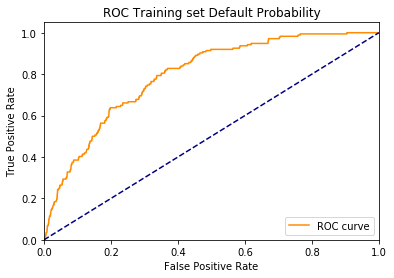

In [30]:
#Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Training set Default Probability')
plt.legend(loc="lower right")
plt.show()

In [31]:
loss_data = pd.read_excel("Final_12.xlsx")

In [ ]:
visualise_null(loss_data)

In [32]:
loss_data = loss_data.dropna(axis='rows')

In [33]:
loss_data.shape

(7591, 36)

In [34]:
#Re-runn the code from here when there are changes made to the categories!!! 
df_temp2 = loss_data.copy()

In [35]:
COLUMN_NUMERIC = ['LogGrossApproval', 'TermInMonths','HPI_Borrower', 'UnemploymentRateBorrState', 'HPI_Borrower', 'LogSP500', 'LiborRate']

COLUMN_CATEGORICAL = ['ApprovalFiscalYear', 'BusinessType', 'LoanYear', 'TPDBinary', 'BusinessType']

LOSS_LABEL = ['GrossChargeOffAmount']

COLUMNS_USED_NEW = COLUMN_NUMERIC + COLUMN_CATEGORICAL + LOSS_LABEL

In [36]:
df_temp2 = df_temp2.loc[:, COLUMNS_USED_NEW]
df_temp2 = df_temp2.reset_index(drop=True)
df_temp2.shape

C:\Users\wille\AppData\Roaming\Python\Python36\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


(7591, 13)

In [37]:
loss_df = df_temp2.copy()

In [38]:
#One hot encoding
to_encode=['ApprovalFiscalYear', 'BusinessType', 'LoanYear', 'TPDBinary', 'BusinessType']

loss_df = pd.get_dummies(loss_df, columns=to_encode)

In [39]:
loss_df.shape

(7591, 49)

In [40]:
loss_df = loss_df.apply(pd.to_numeric)

In [41]:
#Normalize
to_normalize = ['LogGrossApproval', 'TermInMonths','HPI_Borrower', 'UnemploymentRateBorrState', 'HPI_Borrower', 'LogSP500', 'LiborRate']

In [42]:
loss_df[to_normalize] = normalize(loss_df[to_normalize], axis=0)

In [43]:
loss_df.head()

,LogGrossApproval,TermInMonths,HPI_Borrower,UnemploymentRateBorrState,HPI_Borrower,LogSP500,LiborRate,GrossChargeOffAmount,ApprovalFiscalYear_1990.0,ApprovalFiscalYear_1991.0,...,TPDBinary_0.0,TPDBinary_1.0,BusinessType_BLANK,BusinessType_CORPORATION,BusinessType_INDIVIDUAL,BusinessType_PARTNERSHIP,BusinessType_BLANK,BusinessType_CORPORATION,BusinessType_INDIVIDUAL,BusinessType_PARTNERSHIP
0,0.010755,0.011658,0.011822,0.008159,0.011822,0.009485,0.022519,93434.0,1,0,...,1,0,0,1,0,0,0,1,0,0
1,0.010760,0.011658,0.006215,0.010736,0.006215,0.009313,0.022356,80635.0,1,0,...,1,0,0,1,0,0,0,1,0,0
2,0.010233,0.011658,0.013319,0.018896,0.013319,0.009501,0.017743,85254.0,0,1,...,1,0,0,1,0,0,0,1,0,0
3,0.011573,0.011658,0.017859,0.014386,0.017859,0.009554,0.017743,241020.0,0,1,...,1,0,0,1,0,0,0,1,0,0
4,0.010795,0.011658,0.012581,0.009448,0.012581,0.009600,0.016214,88070.0,0,1,...,1,0,0,0,1,0,0,0,1,0


In [44]:
loss_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 49 columns):
LogGrossApproval             7591 non-null float64
TermInMonths                 7591 non-null float64
HPI_Borrower                 7591 non-null float64
UnemploymentRateBorrState    7591 non-null float64
HPI_Borrower                 7591 non-null float64
LogSP500                     7591 non-null float64
LiborRate                    7591 non-null float64
GrossChargeOffAmount         7591 non-null float64
ApprovalFiscalYear_1990.0    7591 non-null uint8
ApprovalFiscalYear_1991.0    7591 non-null uint8
ApprovalFiscalYear_1992.0    7591 non-null uint8
ApprovalFiscalYear_1993.0    7591 non-null uint8
ApprovalFiscalYear_1994.0    7591 non-null uint8
ApprovalFiscalYear_1995.0    7591 non-null uint8
ApprovalFiscalYear_1996.0    7591 non-null uint8
ApprovalFiscalYear_1997.0    7591 non-null uint8
ApprovalFiscalYear_1998.0    7591 non-null uint8
ApprovalFiscalYear_1999.0    7591 non-null u

In [45]:
loss_df_Y = loss_df['GrossChargeOffAmount']
loss_df_X =  loss_df.drop('GrossChargeOffAmount', axis=1)
X_train_loss, X_test_loss, y_train_loss, y_test_loss = train_test_split(loss_df_X, loss_df_Y, test_size=0.1)

In [46]:
X_train_loss.shape, X_test_loss.shape, y_train_loss.shape, y_test_loss.shape

((6831, 48), (760, 48), (6831,), (760,))

In [47]:
X_train_loss.head()

,LogGrossApproval,TermInMonths,HPI_Borrower,UnemploymentRateBorrState,HPI_Borrower,LogSP500,LiborRate,ApprovalFiscalYear_1990.0,ApprovalFiscalYear_1991.0,ApprovalFiscalYear_1992.0,...,TPDBinary_0.0,TPDBinary_1.0,BusinessType_BLANK,BusinessType_CORPORATION,BusinessType_INDIVIDUAL,BusinessType_PARTNERSHIP,BusinessType_BLANK,BusinessType_CORPORATION,BusinessType_INDIVIDUAL,BusinessType_PARTNERSHIP
493,0.011573,0.011658,0.011787,0.006871,0.011787,0.011577,0.013621,0,0,0,...,1,0,0,1,0,0,0,1,0,0
153,0.009817,0.011658,0.007184,0.006871,0.007184,0.010506,0.014904,0,0,0,...,1,0,0,0,1,0,0,0,1,0
6834,0.011484,0.011658,0.007615,0.007515,0.007615,0.011715,0.011929,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3250,0.011178,0.011658,0.011832,0.010951,0.011832,0.011474,0.009008,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3412,0.012512,0.011658,0.015163,0.013313,0.015163,0.011500,0.009772,0,0,0,...,0,1,0,1,0,0,0,1,0,0


In [50]:
#baseline loss model
baseline_loss_model = Sequential()
baseline_loss_model.add(Dense(20, input_dim=X_test_loss.shape[1], activation = 'relu', kernel_initializer='normal', bias_initializer = 'zeros', kernel_regularizer = regularizers.l2(0.01)))
baseline_loss_model.add(Dense(10, input_dim=20, activation = 'relu', kernel_initializer='normal', bias_initializer = 'zeros', kernel_regularizer = regularizers.l2(0.01)))
baseline_loss_model.add(Dense(1, input_dim=10, activation = 'relu', kernel_initializer='normal', bias_initializer = 'zeros', kernel_regularizer = regularizers.l2(0.01)))

# Compile model
adam = keras.optimizers.Adam(lr=0.1, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
baseline_loss_model.compile(optimizer=adam, loss='mean_absolute_error', metrics = ['mae'])

#train model
baseline_loss_model.fit(X_train_loss, y_train_loss, epochs=100, verbose = 1)

Epoch 1/100
6831/6831 [==============================] - 1s 172us/step - loss: 338409.2125 - mean_absolute_error: 338184.5498
Epoch 2/100
6831/6831 [==============================] - 0s 44us/step - loss: 296202.2186 - mean_absolute_error: 295885.8436
Epoch 3/100
6831/6831 [==============================] - 0s 50us/step - loss: 295599.3604 - mean_absolute_error: 295241.6208
Epoch 4/100
6831/6831 [==============================] - 0s 44us/step - loss: 295576.4268 - mean_absolute_error: 295197.9343
Epoch 5/100
6831/6831 [==============================] - 0s 41us/step - loss: 295552.6854 - mean_absolute_error: 295152.4300
Epoch 6/100
6831/6831 [==============================] - 0s 54us/step - loss: 295963.5604 - mean_absolute_error: 295550.6055
Epoch 7/100
6831/6831 [==============================] - 0s 44us/step - loss: 295127.4375 - mean_absolute_error: 294708.1168
Epoch 8/100
6831/6831 [==============================] - 0s 40us/step - loss: 295264.3697 - mean_absolute_error: 294851.0084

In [51]:
y_predict_loss = baseline_loss_model.predict(X_test_loss)

In [53]:
#Clean it up
samples = pd.read_csv("NEWDATA.csv")

samples = samples.dropna(axis='columns')

samples = samples.dropna(axis = 'rows')

C:\Users\wille\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:3044: DtypeWarning: Columns (20,22,30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#Generate versions for default
V1_NUMERIC = ['GrossApproval', 'TermInMonths', 'LoanYear']

V1_CATEGORICAL = ['ApprovalFiscalYear', 'BusinessType', 'BorrState']

V1_LABEL = ['Default']

V1_COLUMNS_USED = V1_NUMERIC + V1_CATEGORICAL + V1_LABEL

In [ ]:
V1_data = samples.loc[:, V1_COLUMNS_USED]
V1_data = V1_data.reset_index(drop=True)
V1_data.shape

In [ ]:
V1_df = V1_data.copy()

In [ ]:
#One hot encoding
columns=['ApprovalFiscalYear', 'BusinessType', 'BorrState']

V1_df = pd.get_dummies(V1_df, columns=columns)
V1_df.shape

In [ ]:
V1_df = V1_df.apply(pd.to_numeric)

In [ ]:
#Normalize
normalize_cols = ['GrossApproval', 'TermInMonths', 'LoanYear']

In [ ]:
V1_df[normalize_cols] = normalize(V1_df[normalize_cols], axis=0)

In [ ]:
V1_df_X = V1_df.drop('Default', axis = 1)

In [ ]:
V1_df_X.shape

In [ ]:
sample_prob = baseline_default_model.predict(V1_df_X)

In [ ]:
#Generate versions for loss
V2_NUMERIC = ['GrossApproval', 'TermInMonths', 'AgeAtDefault']

V2_CATEGORICAL = ['BusinessType', 'ApprovalFiscalYear']

V2_LABEL = ['GrossChargeOffAmount']

V2_COLUMNS_USED = V2_NUMERIC + V2_CATEGORICAL + V2_LABEL

In [ ]:
V2_data = samples.loc[:, V2_COLUMNS_USED]
V2_data = V2_data.reset_index(drop=True)
V2_data.shape

In [ ]:
V2_df = V2_data.copy()

In [ ]:
#One hot encoding
columns=['BusinessType', 'ApprovalFiscalYear']

V2_df = pd.get_dummies(V2_df, columns=columns)
V2_df.shape

In [ ]:
V2_df = V2_df.apply(pd.to_numeric)

In [ ]:
#Normalize
normalize_cols = ['GrossApproval', 'TermInMonths', 'AgeAtDefault']

In [ ]:
V2_df[normalize_cols] = normalize(V2_df[normalize_cols], axis=0)

In [ ]:
V2_df_X = V2_df.drop(['GrossChargeOffAmount', 'ApprovalFiscalYear_2013', 'ApprovalFiscalYear_2014'], axis = 1)

In [ ]:
V2_df_X.head()

In [ ]:
sample_default = baseline_loss_model.predict(V2_df_X)

In [ ]:
a = np.array(sample_prob)
b = np.array(sample_default)
joined = np.column_stack((a,b))

In [ ]:
#sample
idx = np.random.randint(1492889, size=500)
sampled_joined = joined[idx,:]
matrixed = samples.as_matrix(columns = ['GrossApproval'])
amount_sampled = matrixed[idx,:]

In [ ]:
#Finally, simulate
total = np.sum(amount_sampled)
distribution_vector_1yr = []

for i in range (0,10000):
    sum = 0
    for j in range(0,500):
        rand = np.random.uniform(0,1)
        if rand < sampled_joined[j][0]/20:
            sum += sampled_joined[j][1]
    distribution_vector.append(sum/total)
    
distribution_vector_5yr = []
for i in range (0,10000):
    sum = 0
    for j in range(0,500):
        rand = np.random.uniform(0,1)
        if rand < (1 - (1-(sampled_joined[j][0]/20))**5):
            sum += sampled_joined[j][1]
    distribution_vector_5yr.append(sum/total)

In [ ]:
total = np.sum(amount_sampled)
distribution_vector_1yr = []
        
for i in range (0,2000):
    sum = 0
    for j in range(0,500):
        rand = np.random.uniform(0,1)
        if rand > sampled_joined[j][0]:
            sum += sampled_joined[j][1]
    distribution_vector_1yr.append(sum/(total*7))

In [ ]:
plt.hist(distribution_vector_1yr)

In [ ]:
plt.hist(distribution_vector_5yr)

In [ ]:
five_tranch_loss_1yr = []
five_tranch_loss_5yr = []
fifteen_tranch_loss_1yr = []
fifteen_tranch_loss_5yr = []

for j in range(0,500):
    if distribution_vector_1yr[j] > 0.05:
        five_tranch_loss_1yr.append(1)
    else:
        five_tranch_loss_1yr.append(distribution_vector_1yr[j]/0.05)
    if distribution_vector_5yr[j] > 0.05:
        five_tranch_loss_5yr.append(1)
    else:
        five_tranch_loss_5yr.append(distribution_vector_5yr[j]/0.05)
    if distribution_vector_1yr[j] > 0.15:
        fifteen_tranch_loss_1yr.append(1)
    else:
        fifteen_tranch_loss_1yr.append((distribution_vector_1yr[j]-0.05)/0.15)
    if distribution_vector_5yr[j] > 0.15:
        fifteen_tranch_loss_5yr.append(1)
    else:
        fifteen_tranch_loss_5yr.append((distribution_vector_5yr[j]-0.05)/0.15)

In [ ]:
plt.hist(five_tranch_loss_1yr)

In [ ]:
plt.hist(five_tranch_loss_5yr)

In [ ]:
plt.hist(fifteen_tranch_loss_1yr)

In [ ]:
plt.hist(fifteen_tranch_loss_5yr)

In [ ]:
np.percentile(distribution_vector_1yr, 95)

In [ ]:
np.percentile(distribution_vector_1yr, 99)

In [ ]:
np.percentile(distribution_vector_5yr, 95)

In [ ]:
np.percentile(distribution_vector_5yr, 99)

In [ ]:
np.average(distribution_vector_1yr > 0.00467125064100879)

In [ ]:
store_1 = []
store_2 = []
store_3 = []
store_4 = []
for i in range(0,500):
    if distribution_vector_1yr[i] > 0.00467125064100878:
        store_1.append(distribution_vector_1yr[i])
    if distribution_vector_1yr[i] > 0.005067073867793143:
        store_2.append(distribution_vector_1yr[i])
    if distribution_vector_5yr[i] > 0.013011177498148397:
        store_3.append(distribution_vector_5yr[i])
    if distribution_vector_5yr[i] > 0.014543518428203541:
        store_4.append(distribution_vector_5yr[i])

In [ ]:
np.average(store_1)

In [ ]:
np.average(store_2)

In [ ]:
np.average(store_3)

In [ ]:
np.average(store_4)